# Import Libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Dataset Path

In [2]:
dataset_path = 'dataset/images/'

# Image Height and Width

In [3]:
img_h, img_w = 64, 64

# Load Data

In [4]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_w, img_h))
            images.append(img)
            labels.append(label)
    return images, labels

In [5]:
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

In [6]:
features = []
labels = []

In [7]:
for idx, cls in enumerate(classes):
    folder = os.path.join(dataset_path, cls)
    image, label = load_images_from_folder(folder, cls)
    features.extend(image)
    labels.extend(label)

features = np.array(features)
labels = np.array(labels)

# Visualize

# Flatten Image

In [8]:
num_samples = features.shape[0]
features_flattened = features.reshape(num_samples, -1)

In [9]:
features_flattened.shape

(2630, 12288)

# Split Dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features_flattened, labels, test_size=0.2, random_state=11)

# Train KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

# Predict

In [12]:
knn_predictions = knn.predict(x_test)
print("KNN Classification Report")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))

KNN Classification Report
              precision    recall  f1-score   support

        None       1.00      1.00      1.00       179
        amit       1.00      1.00      1.00       149
       bibek       1.00      1.00      1.00       198

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526

KNN Accuracy:  1.0


# Save Model

In [14]:
import joblib
joblib.dump(knn, 'face_model/img_knn_model.pkl')

['face_model/img_knn_model.pkl']

# Load and Test

In [15]:
import joblib
knn = joblib.load("face_model/img_knn_model.pkl")

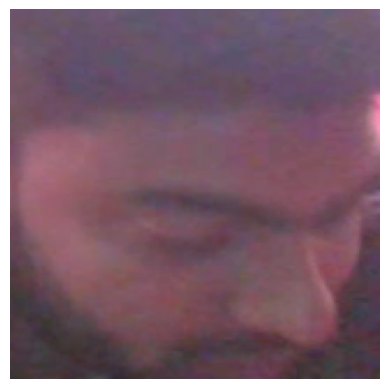

['amit']
[[0. 1. 0.]]


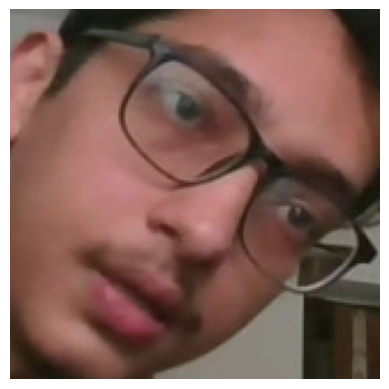

['bibek']
[[0. 0. 1.]]


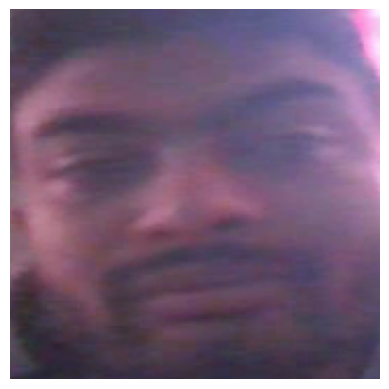

['None']
[[1. 0. 0.]]


In [16]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        img = cv2.resize(img, (64, 64))
        img = img.reshape(1, -1)

        prediction = knn.predict(img)
        print(prediction)
        proba = knn.predict_proba(img)
        print(proba)
        
    except Exception as e:
        print(e)

# SVM

In [17]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)

SVC(probability=True)

In [18]:
svm_predictions = svm.predict(x_test)
print("SVM Classification Report")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))

SVM Classification Report
              precision    recall  f1-score   support

        None       1.00      1.00      1.00       179
        amit       1.00      1.00      1.00       149
       bibek       1.00      1.00      1.00       198

    accuracy                           1.00       526
   macro avg       1.00      1.00      1.00       526
weighted avg       1.00      1.00      1.00       526

SVM Accuracy:  1.0


# Save

In [19]:
import joblib
joblib.dump(svm, 'face_model/img_svm_model.pkl')

['face_model/img_svm_model.pkl']

In [20]:
import joblib

svm = joblib.load("face_model/img_svm_model.pkl")

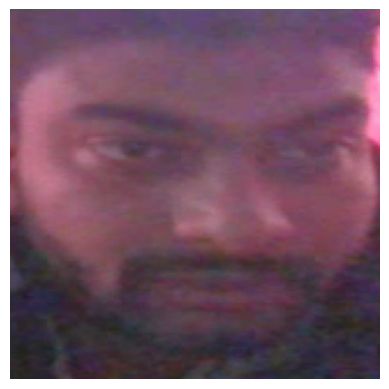

['amit']
[[2.17401032e-03 9.96955684e-01 8.70305238e-04]]


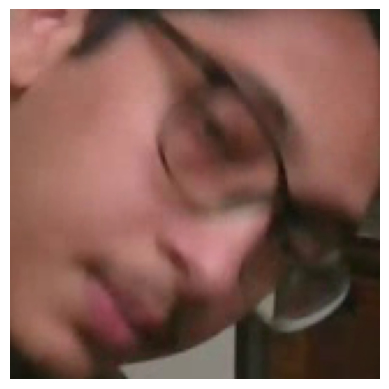

['bibek']
[[6.24077040e-06 7.44775057e-06 9.99986311e-01]]
OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [21]:
for i in range(len(classes)):
    index = np.random.randint(1,1000)
    try:
        img = cv2.imread(f"dataset/images/{classes[i]}/{index}.png")
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        img = cv2.resize(img, (64, 64))
        img = img.reshape(1, -1)

        prediction = svm.predict(img)
        print(prediction)
        proba = svm.predict_proba(img)
        print(proba)
        
    except Exception as e:
        print(e)